<a href="https://colab.research.google.com/github/dami163/Assignment/blob/main/Q_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(-0.5, 560.5, 840.5, -0.5)

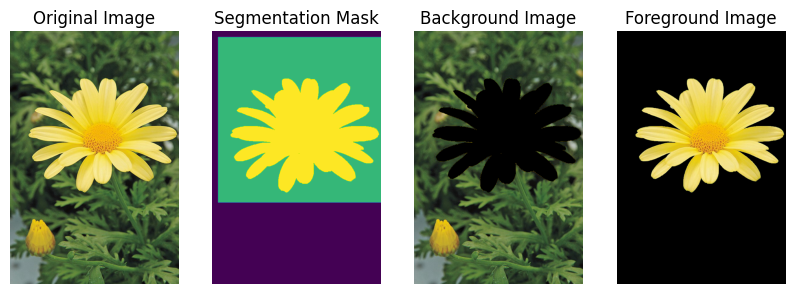

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('daisy.jpg')

mask = np.zeros(image.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

rect = (20, 20, 550, 550)

cv.grabCut(image, mask, rect, None, None, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

foreground = cv.bitwise_and(image, image, mask=mask2)
background = cv.bitwise_and(image, image, mask=1 - mask2)

segmentation_mask = np.where(mask2[:, :, np.newaxis] == 1, 255, 0).astype('uint8')

fig, ax = plt.subplots(1, 4, figsize=(10,10), sharey = True)

ax[0].imshow(image[:,:,::-1]),
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask)
ax[1].set_title('Segmentation Mask')
ax[1].axis('off')

ax[2].imshow(background[:,:,::-1]),
ax[2].set_title('Background Image')
ax[2].axis('off')

ax[3].imshow(foreground[:,:,::-1])
ax[3].set_title('Foreground Image')
ax[3].axis('off')

(-0.5, 560.5, 840.5, -0.5)

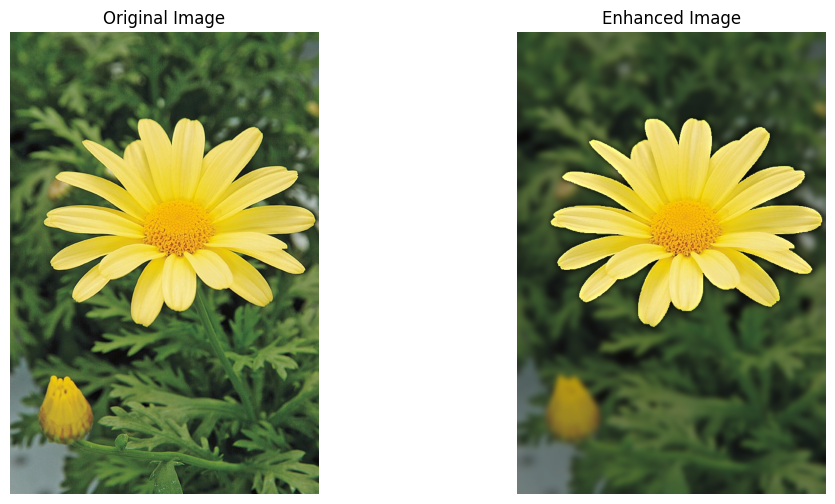

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('daisy.jpg')

mask = np.zeros(image.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)

rect = (20, 20, 550, 550)

cv.grabCut(image, mask, rect, None, None, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')

foreground = cv.bitwise_and(image, image, mask=mask2)
background = cv.bitwise_and(image, image, mask=1 - mask2)
segmentation_mask = np.where(mask2[:, :, np.newaxis] == 1, 255, 0).astype('uint8')

blurred_bg = cv.GaussianBlur(background, (31, 31), 0)
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey = True)

ax[0].imshow(image[:,:,::-1])
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(enhanced_img[:,:,::-1])
ax[1].set_title('Enhanced Image')
ax[1].axis('off')